In [2]:
!pip install yfinance==0.1.74 

In [3]:
!pip install mplcyberpunk

In [1]:
import pandas as pd 
import datetime 
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk

In [2]:
codigos_de_negociacao = ["^BVSP", "BRL=X"] 
#pega a data de hoje
hoje = datetime.datetime.now()
#pega a data de um ano atrás até hoje 
um_ano_atras = hoje - datetime.timedelta(days = 365)
#baixa do yfinance 
dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close               Close                High            \
               BRL=X     ^BVSP     BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                     
2022-02-17  5.135800  113528.0  5.135800  113528.0  5.180000  115214.0   
2022-02-18  5.170600  112768.0  5.170600  112768.0  5.175100  114213.0   
2022-02-21  5.137500  111725.0  5.137500  111725.0  5.149900  113405.0   
2022-02-22  5.102700  112892.0  5.102700  112892.0  5.106600  113315.0   
2022-02-23  5.057100  112008.0  5.057100  112008.0  5.060600  113721.0   
...              ...       ...       ...       ...       ...       ...   
2023-02-10  5.289500  108150.0  5.289500  108150.0  5.304566  108647.0   
2023-02-13  5.213483  108846.0  5.213483  108846.0  5.221400  109193.0   
2023-02-14  5.158400  107659.0  5.158400  107659.0  5.180900  109564.0   
2023-02-15  5.191500  109442.0  5.191500  109442.0  5.237500  110210.0   
2023-02-16  5.218000  109905.0  5.218000  109905.0  5.255600  110437.0   

                 Low                Open           Volume              
               BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                   
2022-02-17  5.121471  113389.0  5.133567  115181.0      0  10807500.0  
2022-02-18  5.116900  112701.0  5.168756  113534.0      0  11300700.0  
2022-02-21  5.074800  111608.0  5.136400  112880.0      0   7864900.0  
2022-02-22  5.046696  111727.0  5.102300  111727.0      0  12707000.0  
2022-02-23  4.996500  111748.0  5.057200  112892.0      0  12120600.0  
...              ...       ...       ...       ...    ...         ...  
2023-02-10  5.225173  107620.0  5.289500  108002.0      0  14458000.0  
2023-02-13  5.159000  107420.0  5.213483  108074.0      0   9973600.0  
2023-02-14  5.126578  107557.0  5.158400  108839.0      0  11894600.0  
2023-02-15  5.144326  107267.0  5.191500  107849.0      0  15499500.0  
2023-02-16  5.195920  108378.0  5.218000  109599.0      0  12995900.0  

[261 rows x 12 columns]

In [3]:
#Manipulando dados - seleção e exclusão de dados 
dados_fechamento = dados_mercado['Adj Close']
#muda o nome das colunas 
dados_fechamento.columns = ['dolar', 'ibovespa']
#tira os dados faltantes
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-02-17,5.135800,113528.0
2022-02-18,5.170600,112768.0
2022-02-21,5.137500,111725.0
2022-02-22,5.102700,112892.0
2022-02-23,5.057100,112008.0
...,...,...
2023-02-10,5.289500,108150.0
2023-02-13,5.213483,108846.0
2023-02-14,5.158400,107659.0


In [4]:
#puxa os dados por ano 
dados_anuais = dados_fechamento.resample('Y').last()
#puxa os dados por mês 
dados_mensais = dados_fechamento.resample('M').last()

display(dados_mensais, dados_anuais)

,dolar,ibovespa
Date,,
2022-02-28,5.1222,113142.0
2022-03-31,4.7697,119999.0
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0


,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.2180,109905.0


In [5]:
#puxa o retono anual, mensal e diario  e calcula a rentabilidade com a função pct.change()

retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

display(retorno_mensal, retorno_anual, retorno_diario)

,dolar,ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


,dolar,ibovespa
Date,,
2023-12-31,-0.009266,-0.001145


,dolar,ibovespa
Date,,
2022-02-18,0.006776,-0.006694
2022-02-21,-0.006402,-0.009249
2022-02-22,-0.006774,0.010445
2022-02-23,-0.008937,-0.007830
2022-02-24,-0.009571,-0.003714
...,...,...
2023-02-10,0.017309,0.003405
2023-02-13,-0.014371,0.006436
2023-02-14,-0.010565,-0.010905


In [6]:
#Localizar o fechamento do dia anterior, retorno no mes e retorno no ano 
retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

retorno_diario_dolar = round((retorno_diario_dolar *100), 3)
retorno_diario_ibov = round((retorno_diario_ibov *100), 3)

retorno_mensal_dolar = round((retorno_mensal_dolar *100), 3)
retorno_mensal_ibov = round((retorno_mensal_ibov *100), 3)

retorno_anual_dolar = round((retorno_anual_dolar *100), 3)
retorno_anual_ibov =round((retorno_anual_ibov *100), 3)


display(retorno_mensal_ibov, retorno_mensal_dolar)

-3.195

2.016

In [7]:
display(retorno_anual_ibov, retorno_anual_dolar)

-0.115

-0.927

In [9]:
display(retorno_diario_ibov, retorno_diario_dolar)

0.423

0.51

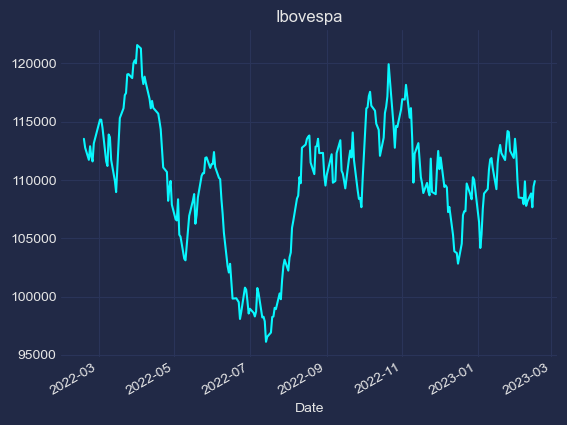

In [10]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False )

plt.title("Ibovespa")
#plt.savefig("ibovespa.png", dpi = 300)

plt.show()

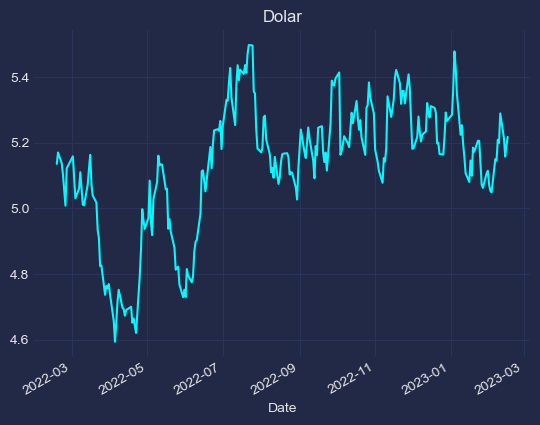

In [11]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False )

plt.title("Dolar")
#plt.savefig("dolar.png", dpi = 300)

plt.show()

In [ ]:
print = (f'''Segue o relátorio diário: \n

Bolsa: \n

No ano, o Ibovespa está tento uma retabilidade de {retorno_anual_ibov}%, 
enquanto no mês a retabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibov}%

Dolar:

No ano, o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%,
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}% 

''')

